# Movies Dataset (1980-2020)
Exploratory Data Analysis

André Rodrigues

October 2023

In [152]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

#Adjust the configuration of the plots we create
matplotlib.rcParams['figure.figsize']=(14,6) 

In [153]:
# Read the data

df = pd.read_csv(r'/Users/andrerodrigues/Documents/DataSets/movies.csv')

In [154]:
# Take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [155]:
#Checking the shape of the data

df.shape

(7668, 15)

In [156]:
#Counting the duplicate rows

df.duplicated().sum()

0

In [157]:
#Summary information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [158]:
# Look for missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col, percent_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [159]:
#Check again for missing values using other way to confirm

df.columns[np.sum(df.isnull())!=0]

Index(['rating', 'released', 'score', 'votes', 'writer', 'star', 'country',
       'budget', 'gross', 'company', 'runtime'],
      dtype='object')

In [160]:
#We can confirm the columns with NO missing values

df.columns[np.sum(df.isnull())==0]

Index(['name', 'genre', 'year', 'director'], dtype='object')

In [161]:
#Check the number of missing values for each column
np.sum(df.isnull())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [162]:
# Drop all rows with missing values
df_new = df.dropna()

In [163]:
# Verify if the rows were dropped
np.sum(df_new.isnull())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [164]:
#Get info on the new dataframe, including the data types
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [165]:
df_new.shape

(5421, 15)

In [166]:
# The votes, budget and gross columns are float for no reason and end with ".0"
# Let's change it

df_new['votes'] = df_new['votes'].astype('int64')
df_new['budget'] = df_new['budget'].astype('int64')
df_new['gross'] = df_new['gross'].astype('int64')

/var/folders/64/49byykbx3l3fggggqdvn2dpc0000gn/T/ipykernel_1379/1703119857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['votes'] = df_new['votes'].astype('int64')
/var/folders/64/49byykbx3l3fggggqdvn2dpc0000gn/T/ipykernel_1379/1703119857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['budget'] = df_new['budget'].astype('int64')
/var/folders/64/49byykbx3l3fggggqdvn2dpc0000gn/T/ipykernel_1379/1703119857.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [167]:
df_new

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [168]:
# Confirm the types
df_new.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [169]:
#Sort the data by budget to see if there is anything irregular like 0$ budget
df_new.sort_values(by='budget', inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,The Living End,Unrated,Comedy,1992,"August 21, 1992 (United States)",6.5,2900,Gregg Araki,Gregg Araki,Mike Dytri,United States,22769,692585,Desperate Pictures,81.0
5114,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0
2093,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0
4507,Primer,PG-13,Drama,2004,"May 27, 2005 (Spain)",6.9,101000,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000,545436,ERBP,77.0


In [170]:
#Sort the data by gross to see if there is anything irregular like 0$ gross
df_new.sort_values(by='gross', inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


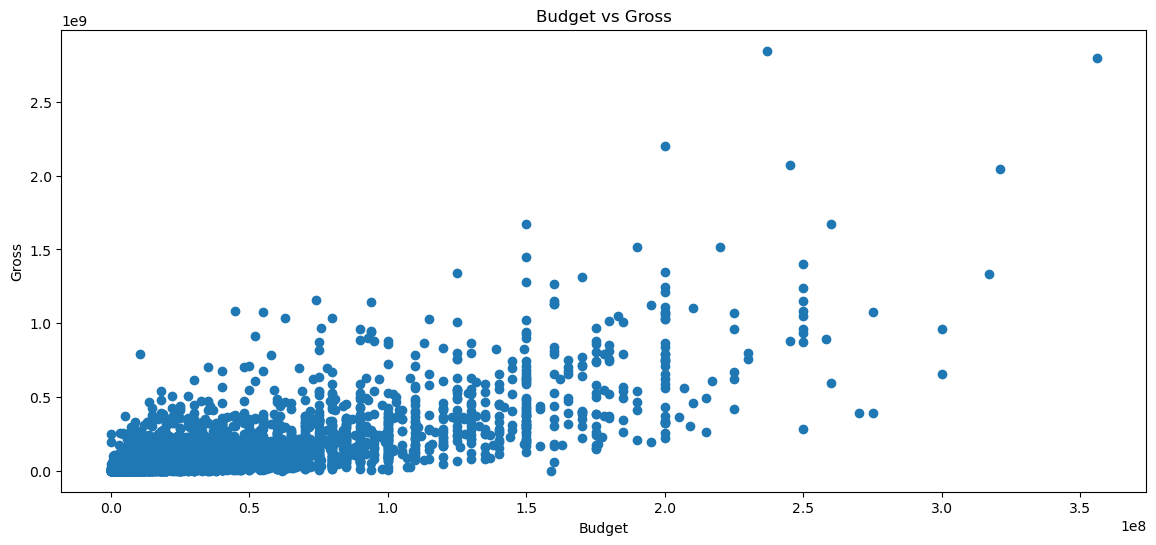

In [171]:
# Check if there is correlation between the columns
#Create a scatter plot between budget and gross

plt.scatter(x=df_new['budget'],y=df_new['gross'])
plt.title('Budget vs Gross')
plt.ylabel('Gross')
plt.xlabel('Budget')
plt.show()

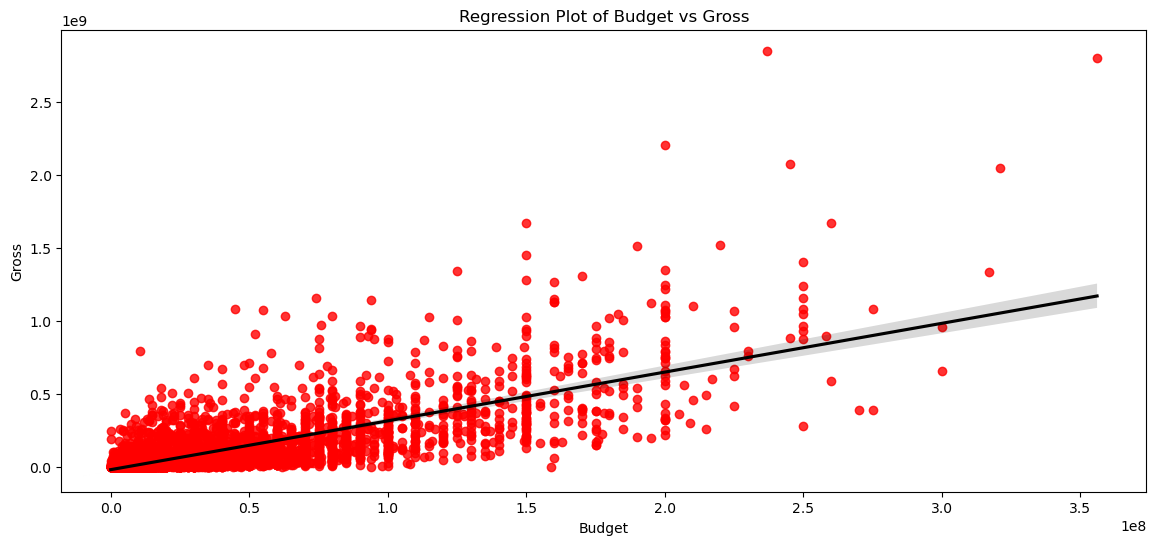

In [172]:
# Using seaborn, we can see the regression line and plot

sns.regplot(x='budget', y='gross', data=df_new, scatter_kws ={'color':'red'}, line_kws={'color':'black'})
plt.title('Regression Plot of Budget vs Gross')
plt.ylabel('Gross')
plt.xlabel('Budget')
plt.show()

In [173]:
# Let's see the actual correlation

#Select only numerical columns because string causes error
numerical_columns = df_new.select_dtypes(include='number')

#Calculate the correlation
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000


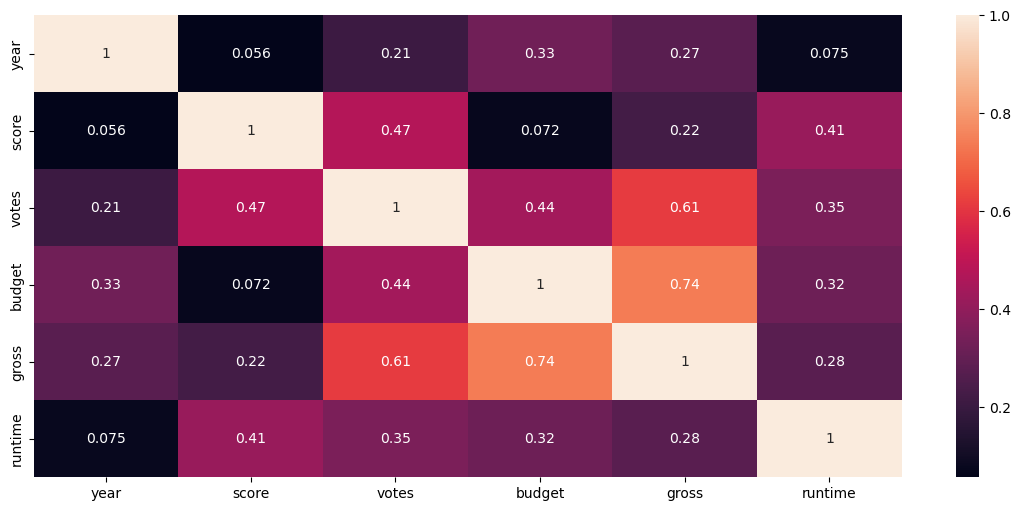

In [174]:
# We can make a heat map to see this correlation
# We can see that the highest correlation happens between budget and gross
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [175]:
# Let's try and correlate the values that are not numeric to see if we can find something 

df_numerized = df_new.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0


In [176]:
#let's check if it makes sense
df_new.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


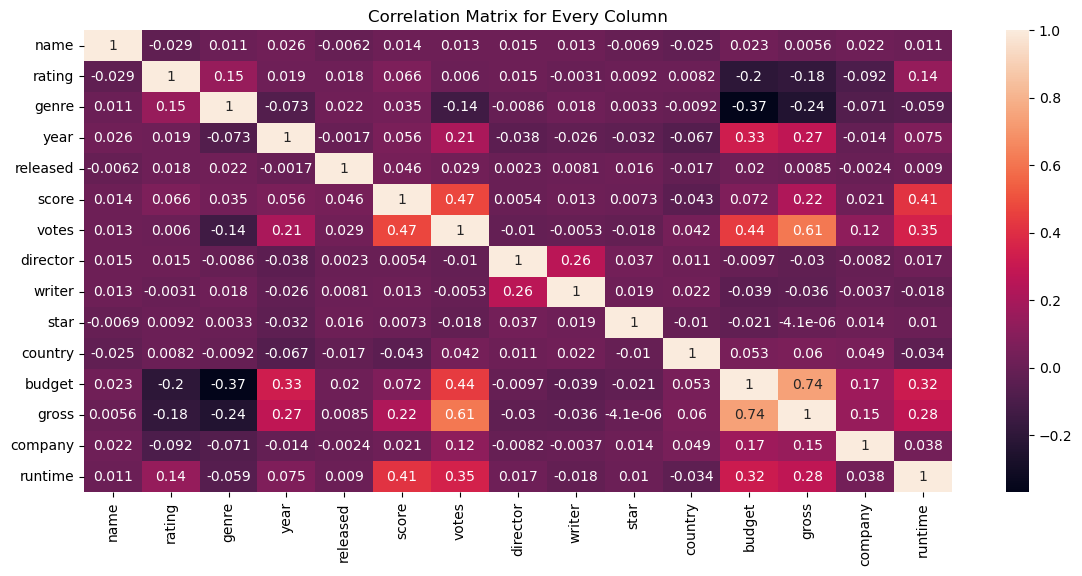

In [177]:
#Let's see the new correlation
new_correlation_matrix = df_numerized.corr()

sns.heatmap(new_correlation_matrix, annot=True)
plt.title('Correlation Matrix for Every Column')
plt.show()

In [146]:
#Let's have a look at the different companies in the dataset
#There are a lot of different companies

companies = df_new['company'].unique()
df_companies = pd.DataFrame(companies)
df_companies

,0
0,Warner Bros.
1,Columbia Pictures
2,Lucasfilm
3,Paramount Pictures
4,Orion Pictures
...,...
1470,Emphatic Films
1471,Hicktown Entertainment
1472,Clubhouse Pictures (II)
1473,20th Century Studios


In [147]:
#Let's see what companies appear the most in the dataset
company_counts = df_new['company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Count']

df_company_counts = pd.DataFrame(company_counts)

df_company_counts

,Company,Count
0,Universal Pictures,330
1,Columbia Pictures,302
2,Warner Bros.,298
3,Paramount Pictures,279
4,Twentieth Century Fox,209
...,...,...
1470,Cinépix Film Properties (CFP),1
1471,Intermedia Films,1
1472,Dollface,1
1473,Calimari Productions,1


In [47]:
df_company_counts.head(16)

,Company,Count
0,Universal Pictures,330
1,Columbia Pictures,302
2,Warner Bros.,298
3,Paramount Pictures,279
4,Twentieth Century Fox,209
5,New Line Cinema,155
6,Walt Disney Pictures,107
7,Touchstone Pictures,105
8,Metro-Goldwyn-Mayer (MGM),99
9,Dreamworks Pictures,75


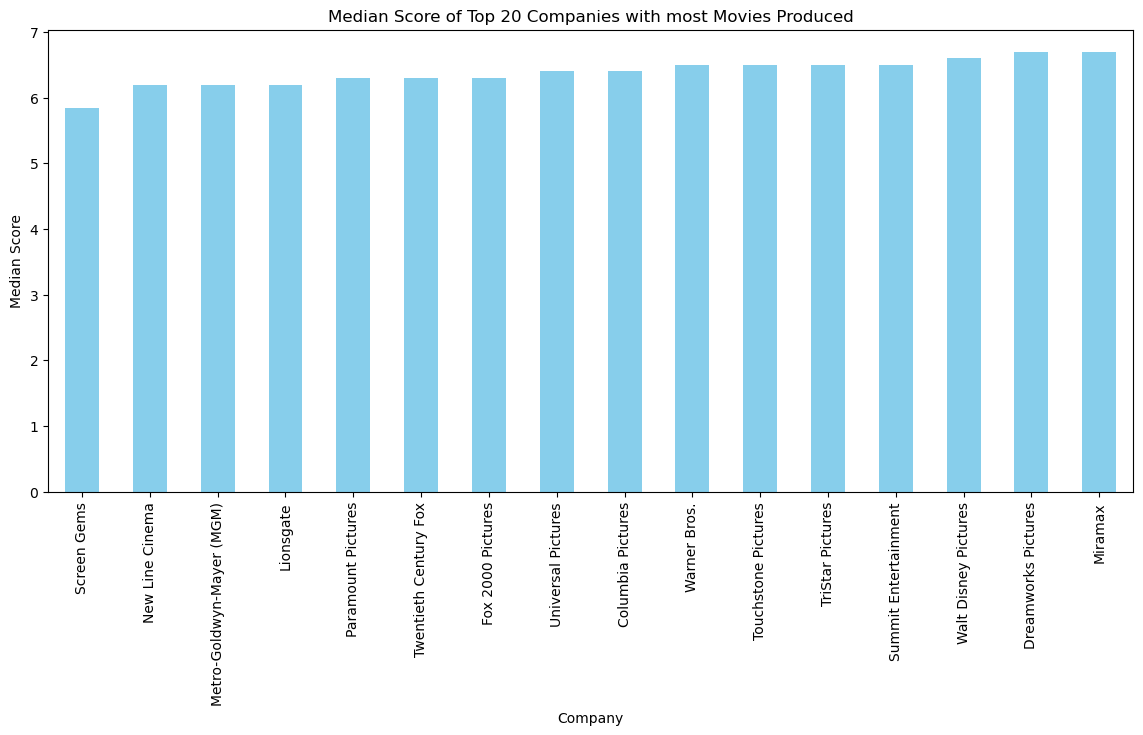

In [79]:
#Let's plot a bar plot of the media score of the top 16 companies with the most movies in the list
# Get the top 16 companies with the most appearances
top_companies = df_new['company'].value_counts().nlargest(16)

# Calculate the median score for each company
median_scores = df_new.groupby('company')['score'].median().loc[top_companies.index]

# Sort by median score
median_scores_sorted = median_scores.sort_values()

# Create a bar plot
plt.figure()
median_scores_sorted.plot(kind='bar', color='skyblue')
plt.title('Median Score of Top 20 Companies with most Movies Produced')
plt.xlabel('Company')
plt.ylabel('Median Score')
#plt.xticks(rotation=50)

plt.show()

In [77]:
#Order the top 250 movies by score
top250_score = df_new.sort_values(by='score', inplace=False, ascending=False).head(250)
top250_score
#df_top_score =pd.DataFrame(top_score)
#df_top_score.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000,1005973645,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000,322161245,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000,1146030912,New Line Cinema,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,Atonement,R,Drama,2007,"January 11, 2008 (United States)",7.8,259000,Joe Wright,Ian McEwan,Keira Knightley,United Kingdom,30000000,131016624,Universal Pictures,123.0
4452,The Notebook,PG-13,Drama,2004,"June 25, 2004 (United States)",7.8,534000,Nick Cassavetes,Jeremy Leven,Gena Rowlands,United States,29000000,117815157,New Line Cinema,123.0
5255,The Curious Case of Benjamin Button,PG-13,Drama,2008,"December 25, 2008 (United States)",7.8,605000,David Fincher,Eric Roth,Brad Pitt,United States,150000000,335802786,Warner Bros.,166.0
6846,Captain America: Civil War,PG-13,Action,2016,"May 6, 2016 (United States)",7.8,694000,Anthony Russo,Christopher Markus,Chris Evans,United States,250000000,1153337496,Marvel Studios,147.0


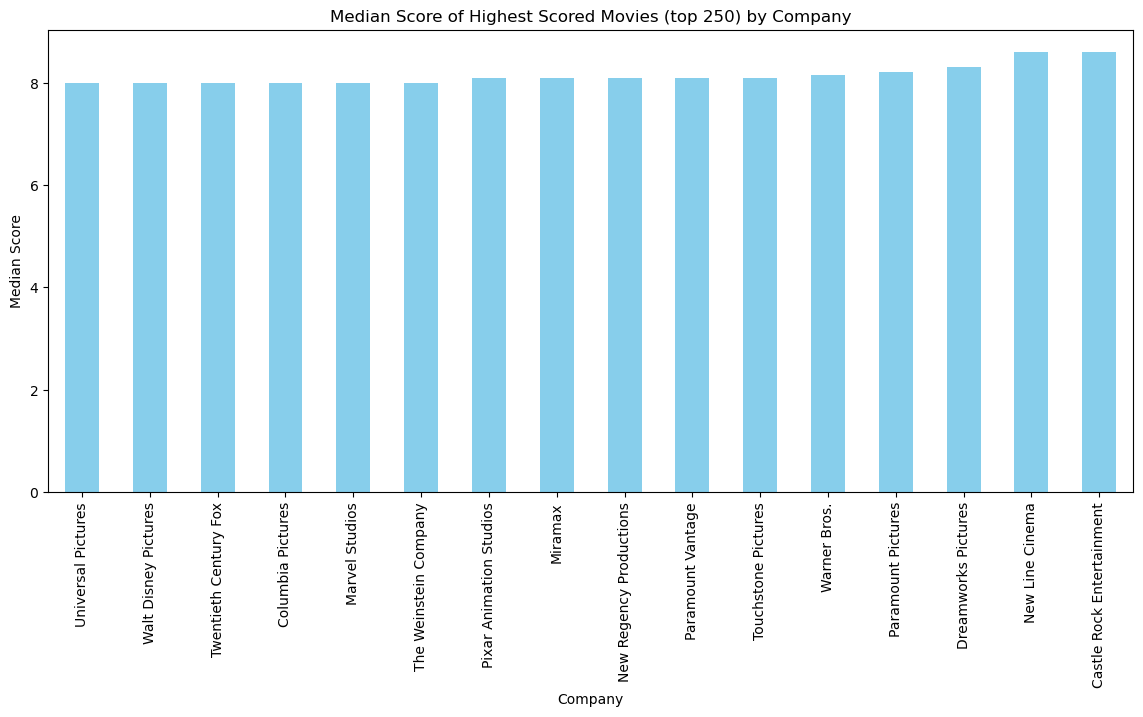

In [97]:
#Let's plot a bar plot of the media score of the top 16 companies with the most movies in the list
# Get the top 16 companies with the most appearances
top250_companies = top250_score['company'].value_counts().nlargest(16)

# Calculate the median score for each company
top250_median_scores = top250_score.groupby('company')['score'].median().loc[top250_companies.index]

# Sort by median score
top250_median_scores_sorted = top250_median_scores.sort_values()

# Create a bar plot
plt.figure()
top250_median_scores_sorted.plot(kind='bar', color='skyblue')
plt.title('Median Score of Highest Scored Movies (top 250) by Company')
plt.xlabel('Company')
plt.ylabel('Median Score')


plt.show()

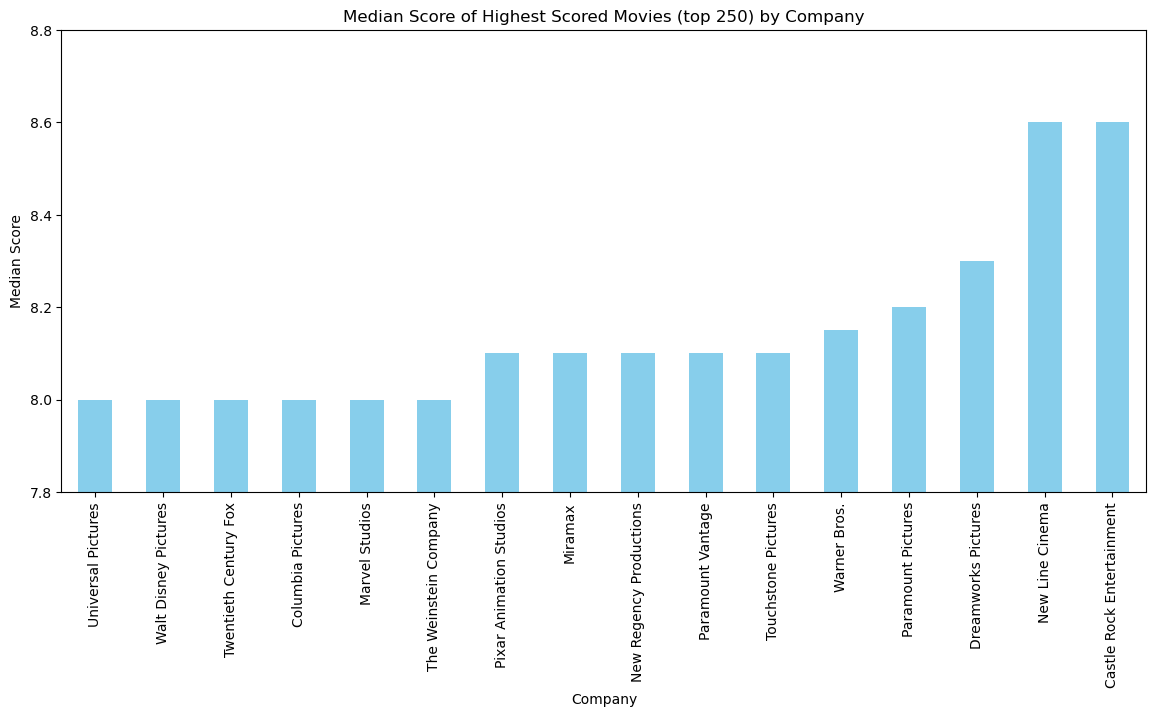

In [104]:
#We cannot spot much difference, let's try and chnage the axis limits
top250_companies = top250_score['company'].value_counts().nlargest(16)

# Calculate the median score for each company
top250_median_scores = top250_score.groupby('company')['score'].median().loc[top250_companies.index]

# Sort by median score
top250_median_scores_sorted = top250_median_scores.sort_values()

# Create a bar plot
plt.figure()
top250_median_scores_sorted.plot(kind='bar', color='skyblue')
plt.title('Median Score of Highest Scored Movies (top 250) by Company')
plt.xlabel('Company')
plt.ylabel('Median Score')
plt.ylim(7.8,8.8)

plt.show()

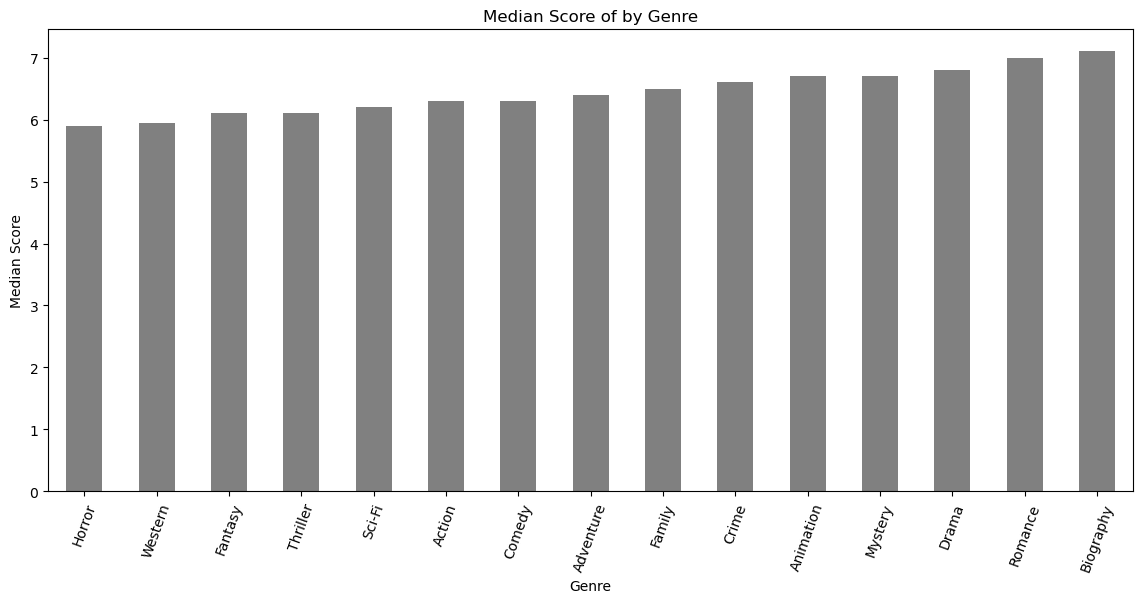

In [184]:
# As the correlation sugested, we are not getting to any conclusion with these plots
# Let's try and group by genre and years/decades and see the median score

# Calculate the median score for each genre
genre_median_scores = df_new.groupby('genre')['score'].median()

# Sort by median score
genre_median_scores_sorted = genre_median_scores.sort_values()

# Create a bar plot
plt.figure()
genre_median_scores_sorted.plot(kind='bar', color='grey')
plt.title('Median Score of by Genre')
plt.xlabel('Genre')
plt.ylabel('Median Score')
plt.xticks(rotation=70)

plt.show()

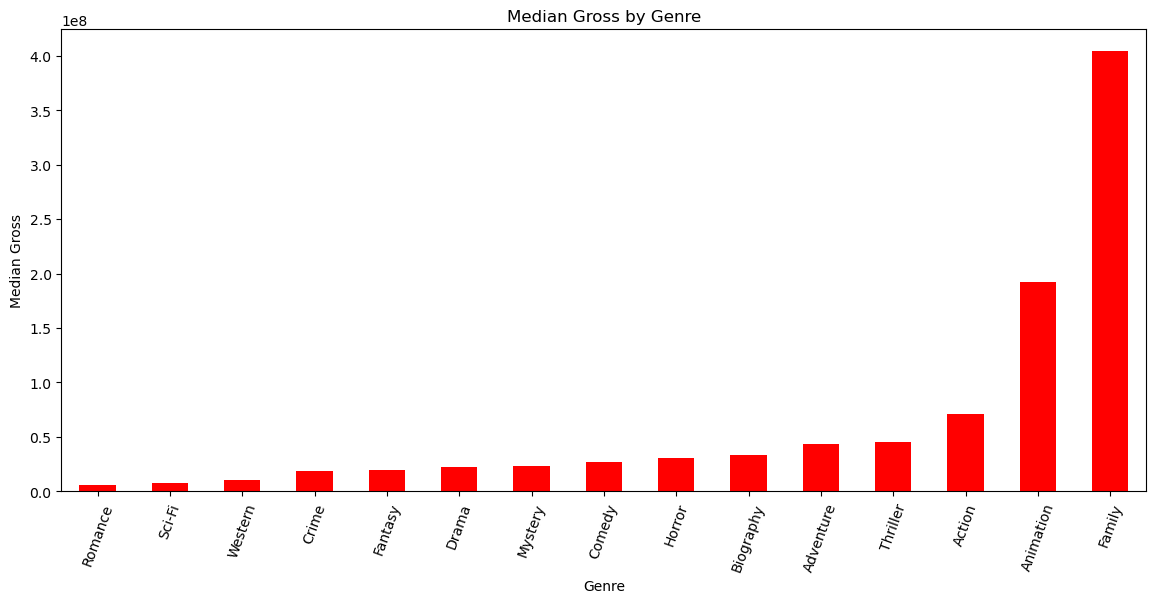

In [189]:
# Plot Gross by Genre
# The genre Family is the one with the highest gross
# Calculate the median gross for each genre
genre_median_gross = df_new.groupby('genre')['gross'].median()

# Sort by median gross
genre_median_gross_sorted = genre_median_gross.sort_values()

# Create a bar plot
plt.figure()
genre_median_gross_sorted.plot(kind='bar', color='red')
plt.title('Median Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Median Gross')
plt.xticks(rotation=70)

plt.show()

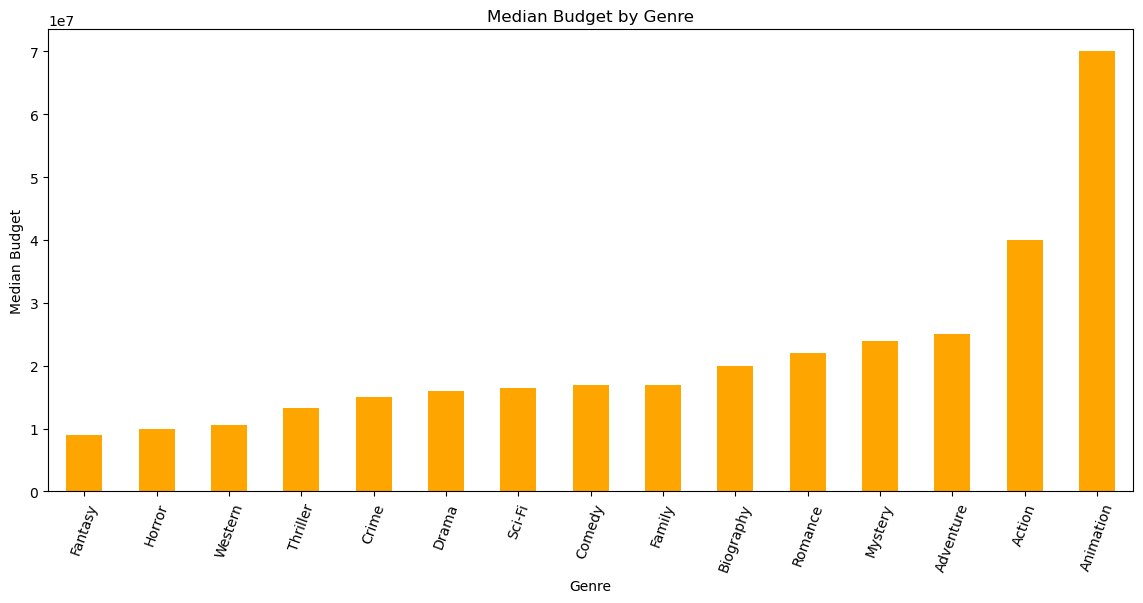

In [192]:
# Plot Budget by Genre
# Calculate the median score for each genre
genre_median_budget = df_new.groupby('genre')['budget'].median()

# Sort by median gross
genre_median_budget_sorted = genre_median_budget.sort_values()

# Create a bar plot
plt.figure()
genre_median_budget_sorted.plot(kind='bar', color='orange')
plt.title('Median Budget by Genre')
plt.xlabel('Genre')
plt.ylabel('Median Budget')
plt.xticks(rotation=70)

plt.show()

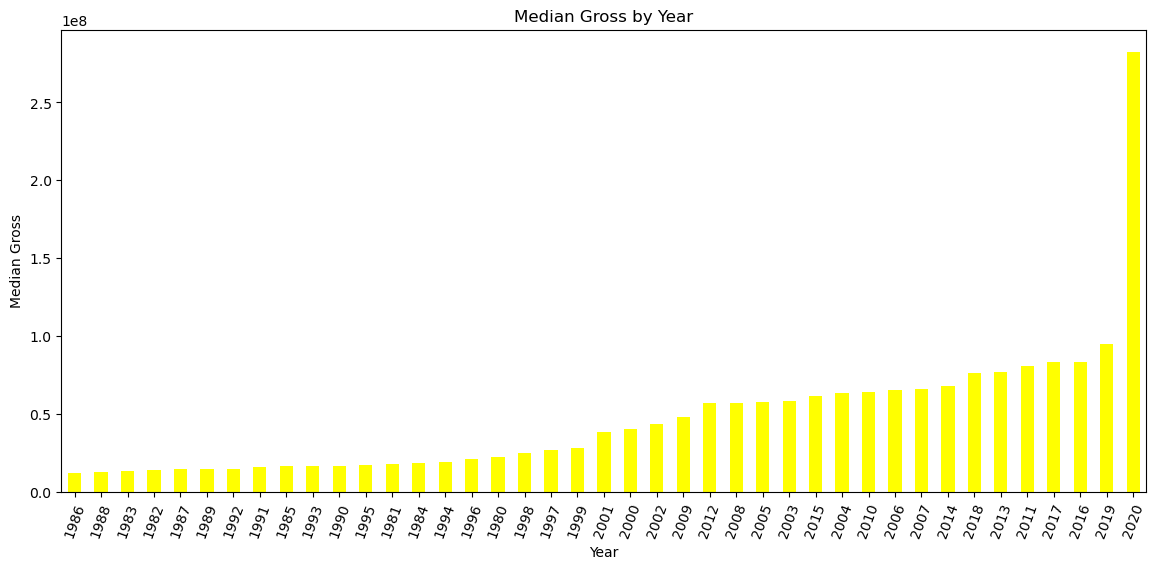

In [208]:
# Plot Gross by Year
# The year 2020 is the one with the highest gross median
# Calculate the median gross for each year
year_median_gross = df_new.groupby('year')['gross'].median()

# Sort by median gross
year_median_gross_sorted = year_median_gross.sort_values()

# Create a bar plot
plt.figure()
year_median_gross_sorted.plot(kind='bar', color='yellow')
plt.title('Median Gross by Year')
plt.xlabel('Year')
plt.ylabel('Median Gross')
plt.xticks(rotation=70)

plt.show()

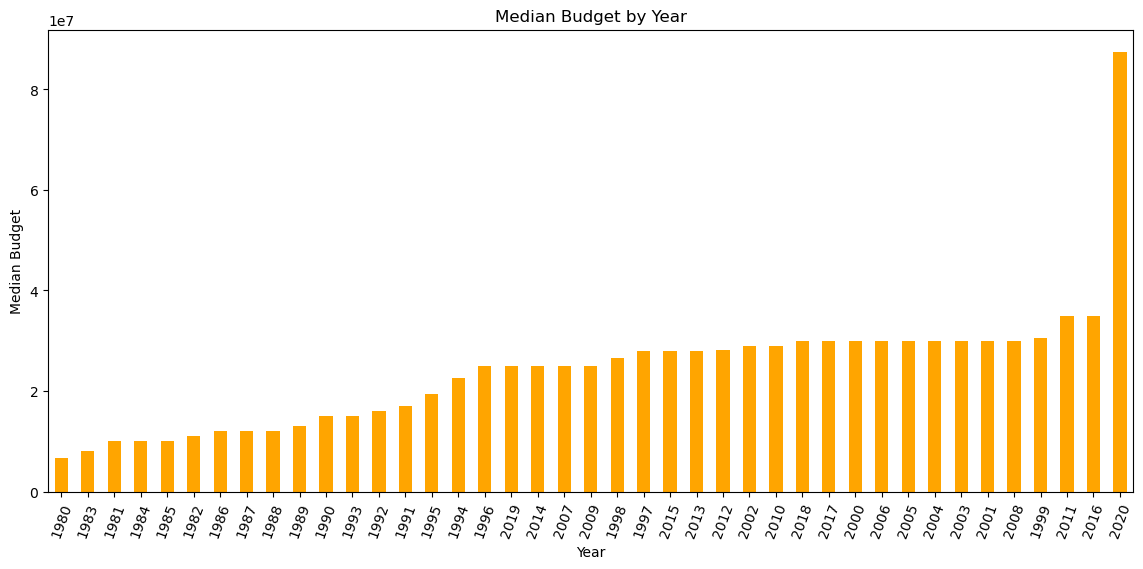

In [206]:
# Plot Budget by Year
# The year 2020 is the one with the highest budget median
# Calculate the median gross for each year
year_median_budget = df_new.groupby('year')['budget'].median()

# Sort by median gross
year_median_budget_sorted = year_median_budget.sort_values()

# Create a bar plot
plt.figure()
year_median_budget_sorted.plot(kind='bar', color='orange')
plt.title('Median Budget by Year')
plt.xlabel('Year')
plt.ylabel('Median Budget')
plt.xticks(rotation=70)

plt.show()